### Momentum 
Annual Return: 0.0477
Sharp Ratio: 0.1937
Max DrawDown: 43.18%


###### Benchmark
Annual Return: 0.1094
Sharp Ratio: 0.3853
Max DrawDown: 52.96%



In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import os

C:\Users\02221\.conda\envs\ml_course1\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
dir_ = "./data"
sp6m = pd.read_csv(os.path.join(dir_,'sp6m_6.csv'))
sp12m = pd.read_csv(os.path.join(dir_,'sp12m_12.csv'))
# sp = pd.read_csv(os.path.join(dir_,'sp.csv'))

In [3]:
sp = yf.download('^GSPC', start='2005-01-01',end='2024-01-20',progress=False)
sp.reset_index(inplace=True)
sp6m['idt'] = pd.to_datetime(sp6m['idt'])


In [4]:
sp['momentum'] = np.log(sp['Close'] / sp['Close'].shift(252)) - np.log(sp['Close'] / sp['Close'].shift(126))
sp = sp.dropna()

In [5]:
sp6m_data = pd.merge(sp, sp6m, right_on='idt', left_on='Date', how='outer', indicator=True)
sp6m_data.dropna(subset=['momentum'], inplace=True)

In [6]:
sp6m_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,momentum,Unnamed: 0,market,...,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc,_merge
0,2006-01-03,1248.290039,1270.219971,1245.739990,1268.800049,1268.800049,2.554570e+09,0.002418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2006-01-04,1268.800049,1275.369995,1267.739990,1273.459961,1273.459961,2.515330e+09,0.005783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2006-01-05,1273.459961,1276.910034,1270.300049,1273.479980,1273.479980,2.433340e+09,0.011866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2006-01-06,1273.479980,1286.089966,1273.479980,1285.449951,1285.449951,2.446560e+09,0.019978,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2006-01-09,1285.449951,1290.780029,1284.819946,1290.150024,1290.150024,2.301490e+09,0.027645,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [7]:
sp6m_data['skew'] = sp6m_data['skew'].ffill()
sp6m_data['mu'] = sp6m_data['mu'].ffill()
sp6m_data['sd'] = sp6m_data['sd'].ffill()
sp6m_data['kurt'] = sp6m_data['kurt'].ffill()

sp6m_data.dropna(subset=['skew'], inplace=True)

In [8]:
moment = sp6m_data.copy()

moment['index'] = 0  
moment.loc[(moment['momentum'] > 0), 'index'] = 1  # entry signal
moment.loc[(moment['momentum'] < 0), 'index'] = -1  # exit signal


In [9]:
# moment[['Date','Open','High','Low','Close','index']].to_csv('Q:/2024 spring/IAQF-Zaichuan/2022-IAQF-Simulation/raw data/backtesting_data1.csv',index=False)


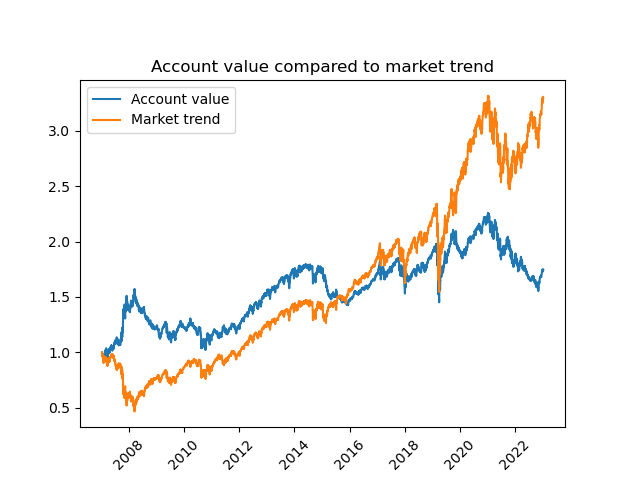

### Skew

63days 1 std
Annual Return: 0.0515
Sharp Ratio: 0.2594
Max DrawDown: 33.49%
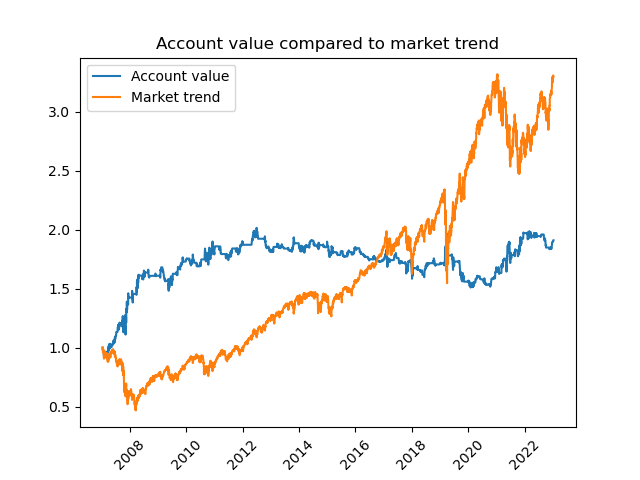




126 days 1 std
Annual Return: 0.05927604080411511
Sharp Ratio: 0.31374813734484885
Max DrawDown: 31.06028188427754%
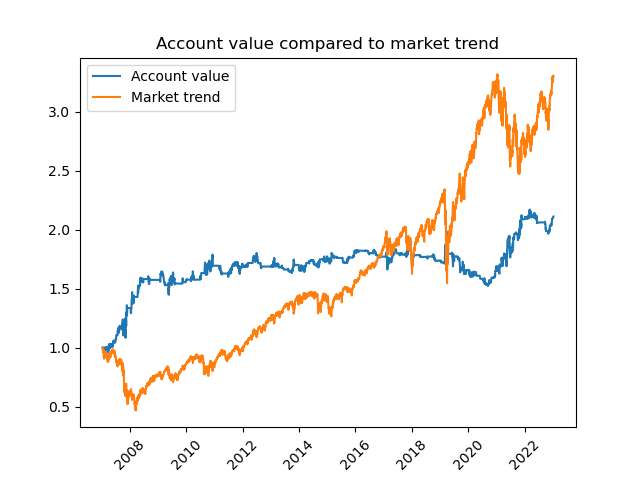

In [10]:
skew = sp6m_data.copy()

skew['index'] = 0  
skew['skew_mu'] = skew['skew'].rolling(window=126).mean()
skew['skew_std'] = skew['skew'].rolling(window=126).std()
skew.loc[(skew['skew'] > skew['skew_mu'] ), 'index'] = 1  # entry signal
skew.loc[(skew['skew'] <= skew['skew_mu'] - skew['skew_std']), 'index'] = -1  # exit signal


In [11]:
#skew[['Date','Open','High','Low','Close','index']].to_csv('Q:/2024 spring/IAQF-Zaichuan/2022-IAQF-Simulation/raw data/backtesting_data2.csv',index=False)


### Momentum and Skew

Annual Return: 0.1148
Sharp Ratio: 0.51
Max DrawDown: 35.17%
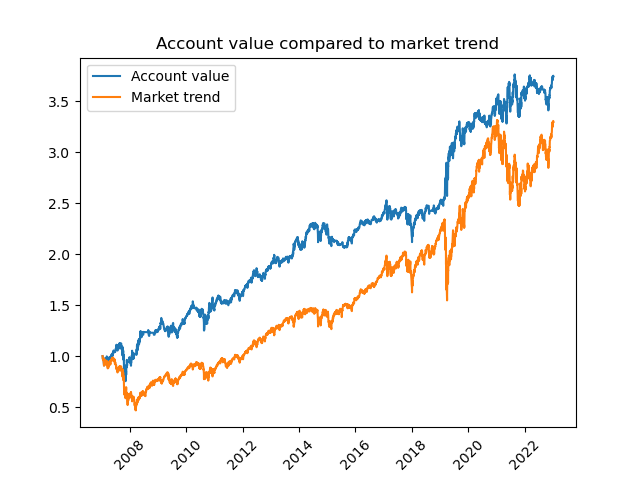


In [12]:
skew.loc[(skew['skew'] > skew['skew_mu'] + skew['skew_std']) |(skew['momentum'] > 0), 'index'] = 1  # entry signal
skew.loc[(skew['skew'] <= skew['skew_mu'] - skew['skew_std']), 'index'] = -1  # exit signal

In [13]:
#skew[['Date','Open','High','Low','Close','index']].to_csv('Q:/2024 spring/IAQF-Zaichuan/2022-IAQF-Simulation/raw data/backtesting_data3.csv',index=False)
